/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


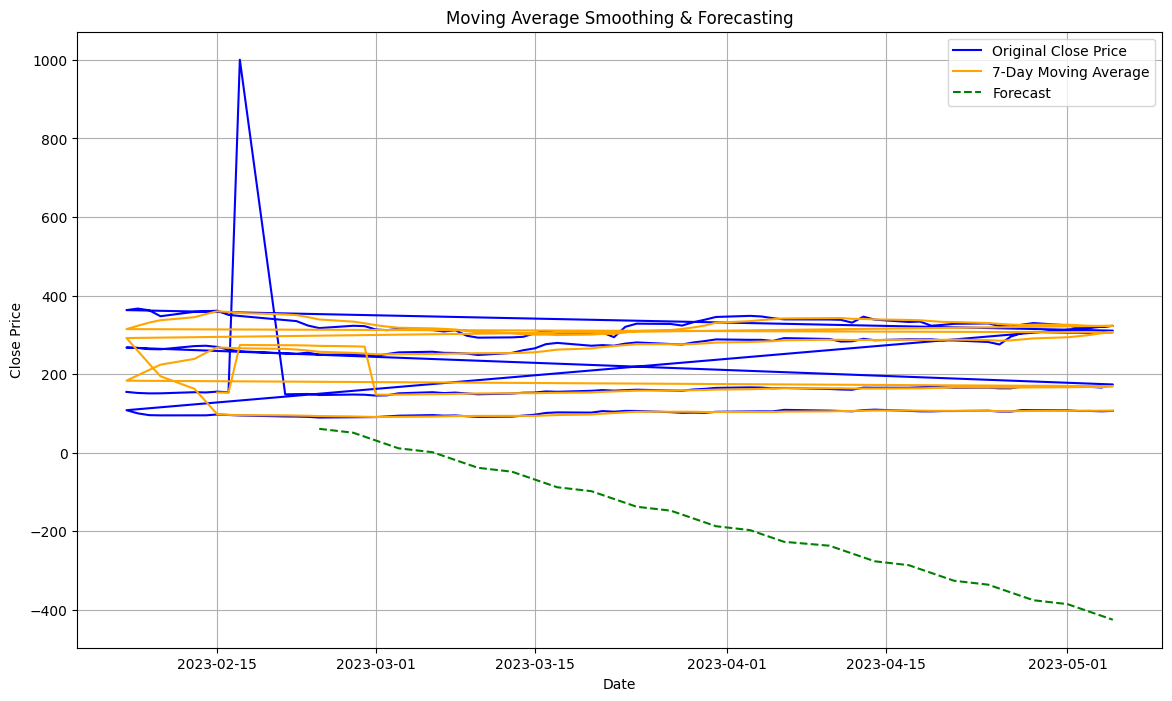


Forecasted Values:
         Date    Forecast
0  2023-02-24   60.584750
1  2023-02-27   50.664252
2  2023-02-28   40.743754
3  2023-03-01   30.823256
4  2023-03-02   20.902758
5  2023-03-03   10.982259
6  2023-03-06    1.061761
7  2023-03-07   -8.858737
8  2023-03-08  -18.779235
9  2023-03-09  -28.699734
10 2023-03-10  -38.620232
11 2023-03-13  -48.540730
12 2023-03-14  -58.461228
13 2023-03-15  -68.381726
14 2023-03-16  -78.302225
15 2023-03-17  -88.222723
16 2023-03-20  -98.143221
17 2023-03-21 -108.063719
18 2023-03-22 -117.984217
19 2023-03-23 -127.904716
20 2023-03-24 -137.825214
21 2023-03-27 -147.745712
22 2023-03-28 -157.666210
23 2023-03-29 -167.586708
24 2023-03-30 -177.507207
25 2023-03-31 -187.427705
26 2023-04-03 -197.348203
27 2023-04-04 -207.268701
28 2023-04-05 -217.189199
29 2023-04-06 -227.109698
30 2023-04-10 -237.030196
31 2023-04-11 -246.950694
32 2023-04-12 -256.871192
33 2023-04-13 -266.791690
34 2023-04-14 -276.712189
35 2023-04-17 -286.632687
36 2023-04-18 -296

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load and preprocess the data
file_path = '/content/dataset.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Apply Moving Average Smoothing
window_size = 7  # You can adjust this for longer/shorter smoothing
data['MA_Smooth'] = data['Close'].rolling(window=window_size).mean()

# Time Series Forecasting using Holt-Winters Exponential Smoothing
# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Fit the model on training data
model = ExponentialSmoothing(train['Close'], trend='add', seasonal=None, seasonal_periods=None)
fitted_model = model.fit()

# Forecasting
forecast_steps = len(test)
forecast = fitted_model.forecast(steps=forecast_steps)

# Plotting
plt.figure(figsize=(14, 8))

# Original & Smoothed Data
plt.plot(data.index, data['Close'], label='Original Close Price', color='blue')
plt.plot(data.index, data['MA_Smooth'], label=f'{window_size}-Day Moving Average', color='orange')

# Forecasting
plt.plot(test.index, forecast, label='Forecast', color='green', linestyle='dashed')

plt.title('Moving Average Smoothing & Forecasting')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Display forecasted values
forecast_df = pd.DataFrame({'Date': test.index, 'Forecast': forecast.values})
print("\nForecasted Values:")
print(forecast_df)
